In [1]:
!pip install gdown


In [2]:
!gdown 1-wm3Hj-9s0rmpUZGCNWJqSib12n2Df2P

Downloading...
From (original): https://drive.google.com/uc?id=1-wm3Hj-9s0rmpUZGCNWJqSib12n2Df2P
From (redirected): https://drive.google.com/uc?id=1-wm3Hj-9s0rmpUZGCNWJqSib12n2Df2P&confirm=t&uuid=25666352-e2ae-48be-aa1f-5d8979bc825d
To: /content/Copy of Copy of devnagari digit.zip
100% 16.6M/16.6M [00:00<00:00, 38.5MB/s]


In [3]:
!unzip Copy\ of\ Copy\ of\ devnagari\ digit.zip

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

In [5]:
# Define paths to training and testing folders

# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

In [6]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [7]:
import numpy as np
# Simple function f(x) = x^2
def f(x):
    return x ** 2
# Manual derivative (f’(x) = 2x)
def gradient(x):
    return 2 * x

# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1
for _ in range(10):
    x -= learning_rate * gradient(x)# Manually optimize for 10 steps
    print(f"x: {x}, f(x): {f(x)}")


x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


In [8]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
    y = x ** 2 # y = x^2
    grad = tape.gradient(y, x) # Computes dy/dx automatically
    print(grad.numpy()) # Output: 10.0

10.0


In [9]:
import numpy as np
import tensorflow as tf
import time
# Create large random matrices
size = (1000, 1000)
A = np.random.rand(*size)
B = np.random.rand(*size)
# NumPy Multiplication
start = time.time()
C_numpy = np.dot(A, B)
print("NumPy Time:", time.time() - start)
# TensorFlow Multiplication (for colab uses GPU Runtime if available)
A_tf = tf.constant(A)
B_tf = tf.constant(B)
start = time.time()
C_tf = tf.matmul(A_tf, B_tf)
print("TensorFlow Time:", time.time() - start)

NumPy Time: 0.061362266540527344
TensorFlow Time: 0.14047598838806152


In [11]:
from tensorflow.keras.layers import Dense
layer = Dense(64, activation="sigmoid")

In [12]:
!pip install Pillow

In [13]:
!pip install matplotlib

In [14]:
!pip install scikit-learn

Class map: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Class map: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Unique y_train labels: [0 1 2 3 4 5 6 7 8 9]
Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


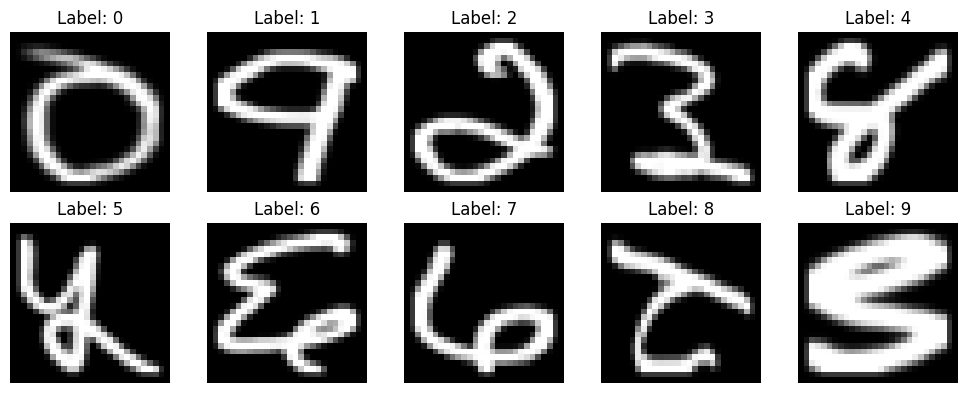

In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []

    # Filter only digit_x folders (avoid .DS_Store etc.)
    class_names = sorted([
        name for name in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, name)) and name.startswith("digit_")
    ])

    class_map = {name: i for i, name in enumerate(class_names)}  # Create label mapping
    print("Class map:", class_map)  # Debug info

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            if filename.endswith(".png"):
                img_path = os.path.join(class_path, filename)
                img = Image.open(img_path).convert("L")  # Grayscale
                img = img.resize((img_width, img_height))
                img = np.array(img) / 255.0
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

# Load datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Confirm label range is valid (0–9)
print("Unique y_train labels:", np.unique(y_train))

# Reshape for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print shapes
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize a few training samples
plt.figure(figsize=(10, 4))
shown_labels = set()
shown_count = 0

for i in range(len(x_train)):
    label = np.argmax(y_train[i])
    if label not in shown_labels:
        plt.subplot(2, 5, shown_count + 1)
        plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis("off")
        shown_labels.add(label)
        shown_count += 1
    if shown_count == 10:
        break

plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(monitor="val_loss", patience=4)
]

history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2917 - loss: 1.9958

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2952 - loss: 1.9889 - val_accuracy: 0.0000e+00 - val_loss: 7.4523
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8006 - loss: 0.6403 - val_accuracy: 0.0000e+00 - val_loss: 8.5092
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9043 - loss: 0.3127 - val_accuracy: 0.0000e+00 - val_loss: 9.2430
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9426 - loss: 0.2046 - val_accuracy: 0.0000e+00 - val_loss: 9.7110
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9567 - loss: 0.1544 - val_accuracy: 0.0000e+00 - val_loss: 9.8808


In [20]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7640 - loss: 2.0970

Test Accuracy: 0.7640


In [21]:
# Save model
model.save('devnagari_fcn_model.h5')

# Load model
from tensorflow.keras.models import load_model
loaded_model = load_model('devnagari_fcn_model.h5')

# Re-evaluate
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"\nLoaded Model Accuracy: {acc:.4f}")

94/94 - 0s - 5ms/step - accuracy: 0.7640 - loss: 2.0970

Loaded Model Accuracy: 0.7640


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


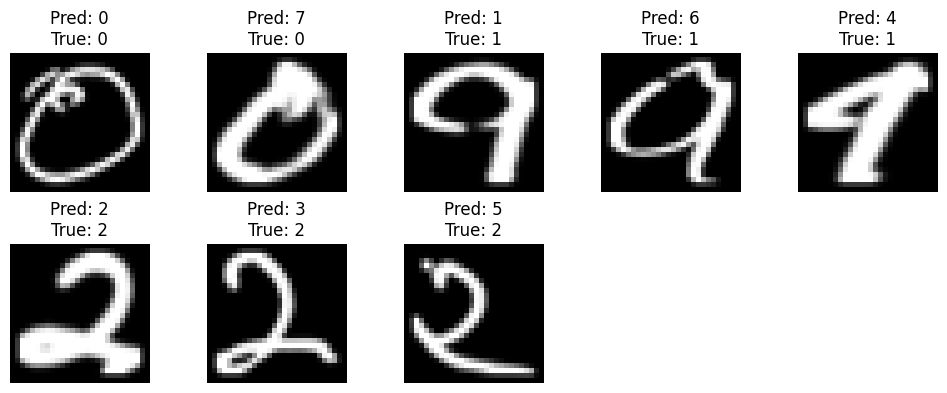

In [22]:
import numpy as np
import matplotlib.pyplot as plt

predictions = loaded_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Show sample predictions (1 per class)
shown_labels = set()
plt.figure(figsize=(10, 4))
shown_count = 0

for i in range(len(x_test)):
    pred = predicted_labels[i]
    true = true_labels[i]
    if pred not in shown_labels:
        plt.subplot(2, 5, shown_count + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {pred}\nTrue: {true}")
        plt.axis("off")
        shown_labels.add(pred)
        shown_count += 1
    if shown_count == 10:
        break

plt.tight_layout()
plt.show()